# [Data Visualization](#Topics)

##### From the dedication page of <u>Grammar of Graphics</u> by Wilkinson, Anand, and Grossman (2005):

> "God hides in the smallest pieces."   

~ Caspar Barlaeus  

> "God hides in the details."  

~ Aby Warbung  

> "God is in the details."  

~ Ludwig Mies van der Rohe  
> "The devil is in the details."  

~ George Shultz  

> "Bad programmers ignore details. Bad designers get lost in the details."  

~ Nate Kirby  

## [Topics](#Data-Visualization)

1. [Brief History](#Brief-History)
2. [Before Grammar of Graphics](#Before-Grammar-of-Graphics)
3. [Grammar of Graphics](#Grammar-of-Graphics)
4. [ggplot2](#ggplot2)
5. [Seaborn](#seaborn)
6. [Bokeh](#Bokeh)

## [Brief History](#Topics)

- 1976 - S released
- 1984 - Matlab released
- 1991 - Python 0.9 released
- 1993 - R released
- 2005 - [Grammar of Graphics](http://smile.amazon.com/Grammar-Graphics-Statistics-Computing/dp/0387245448/ref=smi_www_rco2_go_smi_2053980522?ie=UTF8&%252AVersion%252A=1&%252Aentries%252A=0) published
- 2007 - Matplotlib (Python port of Matlab plotting)
- 2010 - ggplot2 (for R)
- 2012 - Seaborn, Bokeh (Grammar of Graphics for Python)
- 2013 - ggplot (ggplot2 for Python)

## [Before _Grammar of Graphics_](#Topics)

### `plot` in R:

In [1]:
%load_ext rpy2.ipython

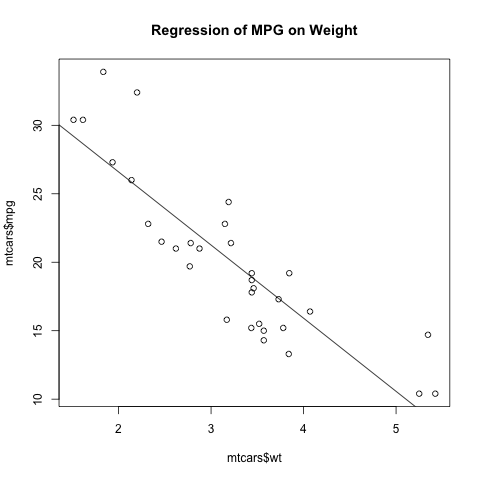

In [2]:
%%R
plot(mtcars$wt, mtcars$mpg)       # plot data as scatter plot
abline(lm(mtcars$mpg ~ mtcars$wt))  # find slope and intercept and plot them as a line
title("Regression of MPG on Weight")  

### `plot` in matplotlib.pylab:

In [3]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


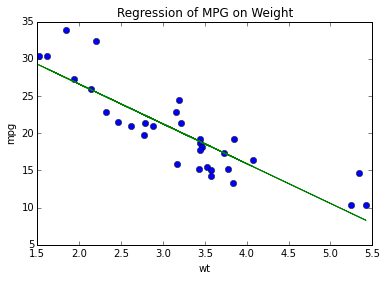

In [4]:
from pandas.rpy.common import load_data  # for getting data from R
from scipy.stats import linregress       # simple linear regression method
mtcars = load_data('mtcars')             # load mtcars data from R
slope, intercept = linregress(mtcars.wt, mtcars.mpg)[:2]  # find slope and intercept (r, p, etc.)
plot(mtcars.wt, mtcars.mpg, 'o')                # plot data
plot(mtcars.wt, mtcars.wt * slope + intercept)  # plot line
title("Regression of MPG on Weight")            # add title and labels
xlabel('wt'); ylabel('mpg');

###  another example: `pie` in R

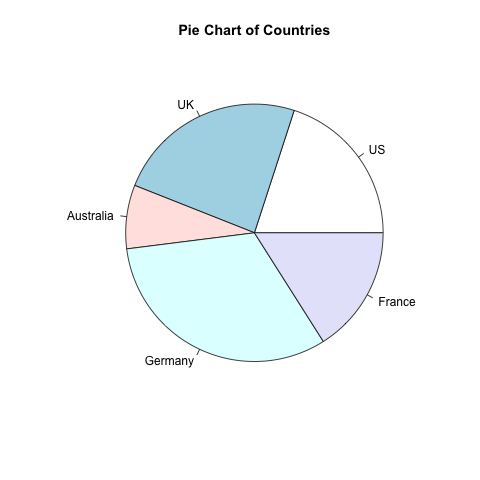

In [5]:
%%R
# Simple Pie Chart
slices <- c(10, 12,4, 16, 8)
lbls <- c("US", "UK", "Australia", "Germany", "France")
pie(slices, labels = lbls, main="Pie Chart of Countries")

### `pie` in matplotlib.pylab:

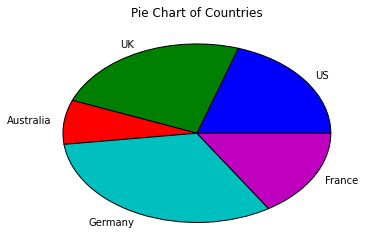

In [6]:
slices = [10, 12,4, 16, 8]
lbls = ["US", "UK", "Australia", "Germany", "France"]
pie(slices, labels = lbls)
title("Pie Chart of Countries");

#### You can do a lot with `matplotlib` though
For example, you could make:
![mpl](http://jakevdp.github.com/figures/mpl_version.png)
look like:
![xkcd](http://jakevdp.github.com/figures/xkcd_version.png)
[...if you are willing to put in the effort:](https://jakevdp.github.io/blog/2012/10/07/xkcd-style-plots-in-matplotlib/)

In [7]:
from scipy import interpolate, signal
import matplotlib.font_manager as fm

# We need a special font for the code below.  It can be downloaded this way:
import os
import urllib2
if not os.path.exists('Humor-Sans.ttf'):
    fhandle = urllib2.urlopen('http://antiyawn.com/uploads/Humor-Sans-1.0.ttf')
    open('Humor-Sans.ttf', 'wb').write(fhandle.read())

def xkcd_line(x, y, xlim=None, ylim=None,
              mag=1.0, f1=30, f2=0.05, f3=15):
    """
    Mimic a hand-drawn line from (x, y) data

    Parameters
    ----------
    x, y : array_like
        arrays to be modified
    xlim, ylim : data range
        the assumed plot range for the modification.  If not specified,
        they will be guessed from the  data
    mag : float
        magnitude of distortions
    f1, f2, f3 : int, float, int
        filtering parameters.  f1 gives the size of the window, f2 gives
        the high-frequency cutoff, f3 gives the size of the filter
    
    Returns
    -------
    x, y : ndarrays
        The modified lines
    """
    x = np.asarray(x)
    y = np.asarray(y)
    
    # get limits for rescaling
    if xlim is None:
        xlim = (x.min(), x.max())
    if ylim is None:
        ylim = (y.min(), y.max())

    if xlim[1] == xlim[0]:
        xlim = ylim
        
    if ylim[1] == ylim[0]:
        ylim = xlim

    # scale the data
    x_scaled = (x - xlim[0]) * 1. / (xlim[1] - xlim[0])
    y_scaled = (y - ylim[0]) * 1. / (ylim[1] - ylim[0])

    # compute the total distance along the path
    dx = x_scaled[1:] - x_scaled[:-1]
    dy = y_scaled[1:] - y_scaled[:-1]
    dist_tot = np.sum(np.sqrt(dx * dx + dy * dy))

    # number of interpolated points is proportional to the distance
    Nu = int(200 * dist_tot)
    u = np.arange(-1, Nu + 1) * 1. / (Nu - 1)

    # interpolate curve at sampled points
    k = min(3, len(x) - 1)
    res = interpolate.splprep([x_scaled, y_scaled], s=0, k=k)
    x_int, y_int = interpolate.splev(u, res[0]) 

    # we'll perturb perpendicular to the drawn line
    dx = x_int[2:] - x_int[:-2]
    dy = y_int[2:] - y_int[:-2]
    dist = np.sqrt(dx * dx + dy * dy)

    # create a filtered perturbation
    coeffs = mag * np.random.normal(0, 0.01, len(x_int) - 2)
    b = signal.firwin(f1, f2 * dist_tot, window=('kaiser', f3))
    response = signal.lfilter(b, 1, coeffs)

    x_int[1:-1] += response * dy / dist
    y_int[1:-1] += response * dx / dist

    # un-scale data
    x_int = x_int[1:-1] * (xlim[1] - xlim[0]) + xlim[0]
    y_int = y_int[1:-1] * (ylim[1] - ylim[0]) + ylim[0]
    
    return x_int, y_int


def XKCDify(ax, mag=1.0,
            f1=50, f2=0.01, f3=15,
            bgcolor='w',
            xaxis_loc=None,
            yaxis_loc=None,
            xaxis_arrow='+',
            yaxis_arrow='+',
            ax_extend=0.1,
            expand_axes=False):
    """Make axis look hand-drawn

    This adjusts all lines, text, legends, and axes in the figure to look
    like xkcd plots.  Other plot elements are not modified.
    
    Parameters
    ----------
    ax : Axes instance
        the axes to be modified.
    mag : float
        the magnitude of the distortion
    f1, f2, f3 : int, float, int
        filtering parameters.  f1 gives the size of the window, f2 gives
        the high-frequency cutoff, f3 gives the size of the filter
    xaxis_loc, yaxis_log : float
        The locations to draw the x and y axes.  If not specified, they
        will be drawn from the bottom left of the plot
    xaxis_arrow, yaxis_arrow : str
        where to draw arrows on the x/y axes.  Options are '+', '-', '+-', or ''
    ax_extend : float
        How far (fractionally) to extend the drawn axes beyond the original
        axes limits
    expand_axes : bool
        if True, then expand axes to fill the figure (useful if there is only
        a single axes in the figure)
    """
    # Get axes aspect
    ext = ax.get_window_extent().extents
    aspect = (ext[3] - ext[1]) / (ext[2] - ext[0])

    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xspan = xlim[1] - xlim[0]
    yspan = ylim[1] - xlim[0]

    xax_lim = (xlim[0] - ax_extend * xspan,
               xlim[1] + ax_extend * xspan)
    yax_lim = (ylim[0] - ax_extend * yspan,
               ylim[1] + ax_extend * yspan)

    if xaxis_loc is None:
        xaxis_loc = ylim[0]

    if yaxis_loc is None:
        yaxis_loc = xlim[0]

    # Draw axes
    xaxis = plt.Line2D([xax_lim[0], xax_lim[1]], [xaxis_loc, xaxis_loc],
                      linestyle='-', color='k')
    yaxis = plt.Line2D([yaxis_loc, yaxis_loc], [yax_lim[0], yax_lim[1]],
                      linestyle='-', color='k')

    # Label axes3, 0.5, 'hello', fontsize=14)
    ax.text(xax_lim[1], xaxis_loc - 0.02 * yspan, ax.get_xlabel(),
            fontsize=14, ha='right', va='top', rotation=12)
    ax.text(yaxis_loc - 0.02 * xspan, yax_lim[1], ax.get_ylabel(),
            fontsize=14, ha='right', va='top', rotation=78)
    ax.set_xlabel('')
    ax.set_ylabel('')

    # Add title
    ax.text(0.5 * (xax_lim[1] + xax_lim[0]), yax_lim[1],
            ax.get_title(),
            ha='center', va='bottom', fontsize=16)
    ax.set_title('')

    Nlines = len(ax.lines)
    lines = [xaxis, yaxis] + [ax.lines.pop(0) for i in range(Nlines)]

    for line in lines:
        x, y = line.get_data()

        x_int, y_int = xkcd_line(x, y, xlim, ylim,
                                 mag, f1, f2, f3)

        # create foreground and background line
        lw = line.get_linewidth()
        line.set_linewidth(2 * lw)
        line.set_data(x_int, y_int)

        # don't add background line for axes
        if (line is not xaxis) and (line is not yaxis):
            line_bg = plt.Line2D(x_int, y_int, color=bgcolor,
                                linewidth=8 * lw)

            ax.add_line(line_bg)
        ax.add_line(line)

    # Draw arrow-heads at the end of axes lines
    arr1 = 0.03 * np.array([-1, 0, -1])
    arr2 = 0.02 * np.array([-1, 0, 1])

    arr1[::2] += np.random.normal(0, 0.005, 2)
    arr2[::2] += np.random.normal(0, 0.005, 2)

    x, y = xaxis.get_data()
    if '+' in str(xaxis_arrow):
        ax.plot(x[-1] + arr1 * xspan * aspect,
                y[-1] + arr2 * yspan,
                color='k', lw=2)
    if '-' in str(xaxis_arrow):
        ax.plot(x[0] - arr1 * xspan * aspect,
                y[0] - arr2 * yspan,
                color='k', lw=2)

    x, y = yaxis.get_data()
    if '+' in str(yaxis_arrow):
        ax.plot(x[-1] + arr2 * xspan * aspect,
                y[-1] + arr1 * yspan,
                color='k', lw=2)
    if '-' in str(yaxis_arrow):
        ax.plot(x[0] - arr2 * xspan * aspect,
                y[0] - arr1 * yspan,
                color='k', lw=2)

    # Change all the fonts to humor-sans.
    prop = fm.FontProperties(fname='Humor-Sans.ttf', size=16)
    for text in ax.texts:
        text.set_fontproperties(prop)
    
    # modify legend
    leg = ax.get_legend()
    if leg is not None:
        leg.set_frame_on(False)
        
        for child in leg.get_children():
            if isinstance(child, plt.Line2D):
                x, y = child.get_data()
                child.set_data(xkcd_line(x, y, mag=10, f1=100, f2=0.001))
                child.set_linewidth(2 * child.get_linewidth())
            if isinstance(child, plt.Text):
                child.set_fontproperties(prop)
    
    # Set the axis limits
    ax.set_xlim(xax_lim[0] - 0.1 * xspan,
                xax_lim[1] + 0.1 * xspan)
    ax.set_ylim(yax_lim[0] - 0.1 * yspan,
                yax_lim[1] + 0.1 * yspan)

    # adjust the axes
    ax.set_xticks([])
    ax.set_yticks([])      

    if expand_axes:
        ax.figure.set_facecolor(bgcolor)
        ax.set_axis_off()
        ax.set_position([0, 0, 1, 1])
    
    return ax

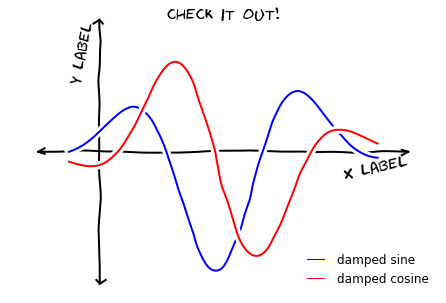

In [8]:
np.random.seed(0)

ax = pylab.axes()

x = np.linspace(0, 10, 100)
ax.plot(x, np.sin(x) * np.exp(-0.1 * (x - 5) ** 2), 'b', lw=1, label='damped sine')
ax.plot(x, -np.cos(x) * np.exp(-0.1 * (x - 5) ** 2), 'r', lw=1, label='damped cosine')

ax.set_title('check it out!')
ax.set_xlabel('x label')
ax.set_ylabel('y label')

ax.legend(loc='lower right')

ax.set_xlim(0, 10)
ax.set_ylim(-1.0, 1.0)

#XKCDify the axes -- this operates in-place
XKCDify(ax, xaxis_loc=0.0, yaxis_loc=1.0,
        xaxis_arrow='+-', yaxis_arrow='+-',
        expand_axes=True);

## [Grammar of Graphics](#Topics)

From the introduction to _Grammar of Graphics_:
> Grammar gives language rules. The word stems from the Greek noun for letter or mark ($\gamma\rho\acute\alpha\mu\mu\alpha$). And that derives from the Greek verb for writing ($\gamma\rho\acute\alpha\phi\omega$), which is the source of our English word **graph**. Grammar means, more generally, rules for art and science. . .  

> . . . The grammar of graphics takes us beyond a limited set of charts (words) to an almost unlimited world of graphical forms (statements). The rules of graphics grammar are sometimes mathematical and sometimes aesthetic. . . .  

> We often call graphics **charts** . . . charts are usually instances of much more general objects. Once we understand that a pie is a divided bar in polar coordinates, we can construct other polar graphics that are less well known. We will also come to realize why a histogram is not a bar chart and why many other graphics that look similar nevertheless have different grammars.

## [`ggplot2`](#Topics)

Notice that by itself, the [`ggplot`](http://docs.ggplot2.org/current/) function doesn't actually plot anything:

In [9]:
%%R
library(ggplot2)
pie <- ggplot(mtcars, aes(x = factor(1), fill = factor(cyl)))

The graphics are built up through statements such as [`geom_bar`](http://docs.ggplot2.org/current/geom_bar.html):

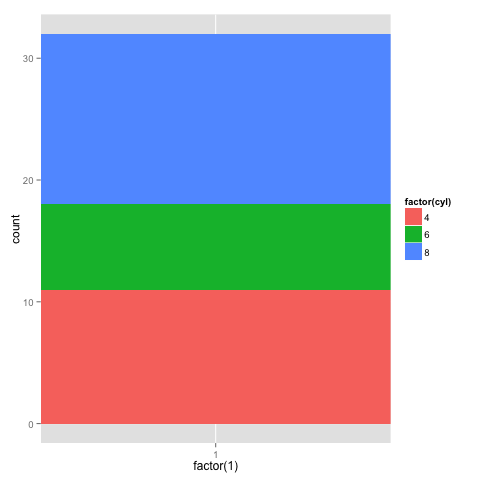

In [10]:
%%R
pie <- pie + geom_bar(width = 1)
pie

These are then transformed by statements like [`coord_polar`](http://docs.ggplot2.org/current/coord_polar.html):

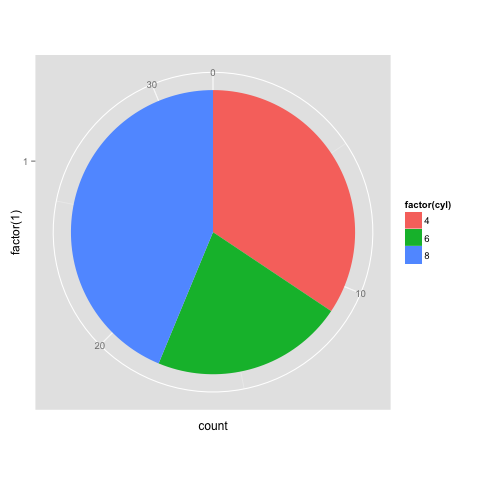

In [11]:
%%R
pie + coord_polar(theta = "y")

Thanks to the folks at [Yhat](http://blog.yhathq.com/posts/ggplot-for-python.html), we have a port of [`ggplot`](https://ggplot.yhathq.com/) in Python:
```bash
pip install ggplot
```

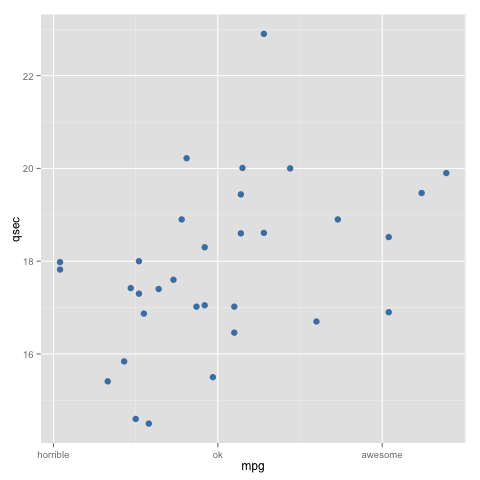

In [12]:
%%R
ggplot(mtcars, aes(mpg, qsec)) +
  geom_point(colour='steelblue', size=3) +
  scale_x_continuous(breaks=c(10,20,30), 
                     labels=c("horrible", "ok", "awesome"))

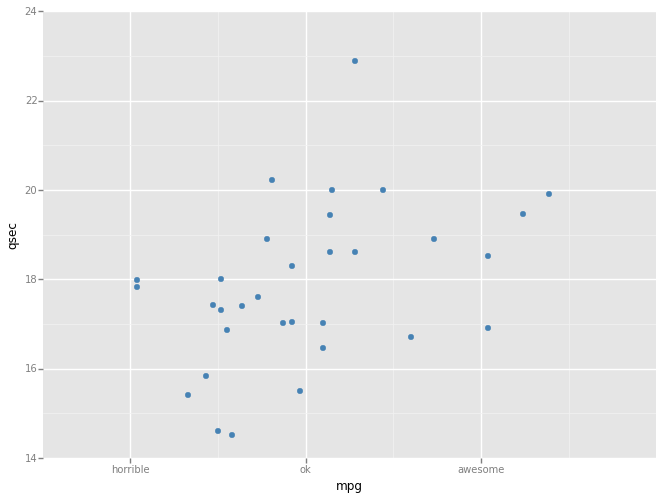

<ggplot: (288001357)>

In [13]:
from ggplot import *
ggplot(mtcars, aes('mpg', 'qsec')) + \
    geom_point(colour='steelblue', size=30) + \
    scale_x_continuous(breaks=[10,20,30], 
                       labels=["horrible", "ok", "awesome"])

Unfortunately, not all of `ggplot2`'s functions have been ported to `ggplot`:

In [14]:
pie = ggplot(mtcars, aes(x = 1, fill = 'factor(cyl)')) + geom_bar(width = 1)
pie + coord_polar(theta = "y")

NameError: name 'coord_polar' is not defined

***You probably shouldn't be doing pie charts anyway.***

One of the problems with python's `ggplot` (besides the fact that it's incomplete) is that it isn't very *[pythonic](http://python.net/~goodger/projects/pycon/2007/idiomatic/handout.html)*.  
...enter:

## [`seaborn`](#Topics)

We like [Seaborn](http://stanford.edu/~mwaskom/software/seaborn/) because it is Pythonic and it is a direct extention of `matplotlib`. Importing `plt` from `seaborn` is essentially a "monky patch" of `matplotlib.pyplot`. It replaces defaults with ones more aesthetically pleasing, but it doesn't actually change the grammar: 

In [15]:
from seaborn import plt

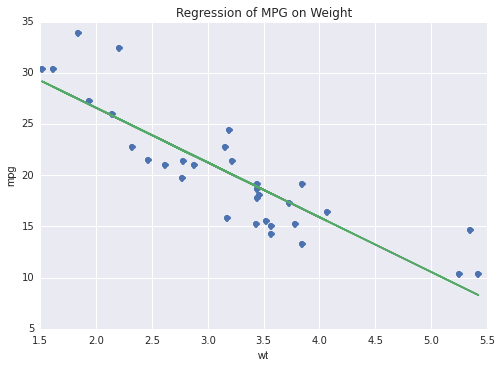

In [16]:
plot(mtcars.wt, mtcars.mpg, 'o')                # plot data
plot(mtcars.wt, mtcars.wt * slope + intercept)  # plot line
title("Regression of MPG on Weight")            # add title and labels
xlabel('wt'); ylabel('mpg');

But `seaborn` has it's own set of statistical visualization functions such as `lmplot`:

In [17]:
import seaborn as sns

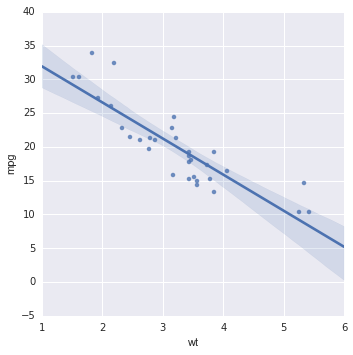

In [18]:
sns.lmplot('wt', 'mpg', mtcars)

See http://stanford.edu/~mwaskom/software/seaborn/tutorial.html for more examples.

## [Bokeh](#Topics)
```bash
conda install bokeh
```
Bokeh is (yet) another attempt at creating a grammar of graphics for Python. Unlike `ggplot`, it is not a port, but is built from the ground up as a Python library. Unlike `seaborn`, it does not attempt compatibility with `matplotlib` but rather attempts a whole new approach to data visualization.

Also unlike `seaborn`, it is more general purpose (while `seaborn` is optimized for statistical visualization).


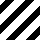
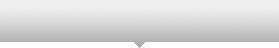
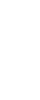
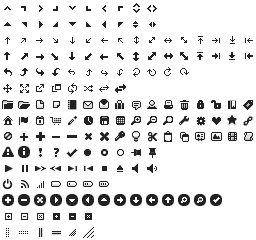
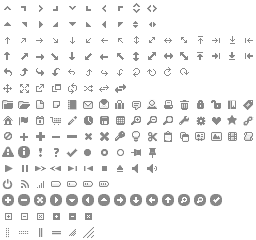
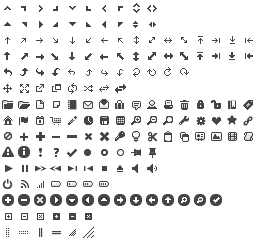
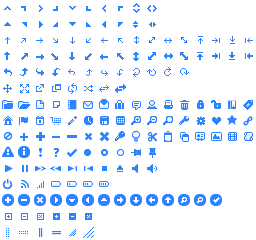
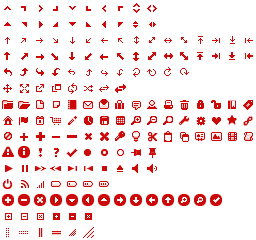
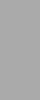
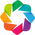
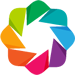
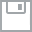
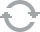
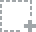
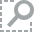
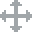
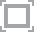
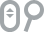

In [19]:
from bokeh.plotting import figure, output_notebook, show

# prepare some data
x = [1, 2, 3, 4, 5]
y = [6, 7, 2, 4, 5]

# output to the notebook
output_notebook()

# Plot a `line` renderer setting the color, line thickness, title, and legend value.
p = figure(title="simple line example")
p.line(x, y, legend="Temp.", x_axis_label='x', y_axis_label='y')

show(p)

In the above cell, we told `bokeh.plotting` that:  
1. We want to write our plots to the notebook (and not to a separate file, for example)
2. Build a line from our data and add some simple customizations like title, legend and axes labels
3. Ask to show the result (important)  

Notice in the example below, Bokeh does not have it's own `histogram` function but rather uses the function provided by `numpy`:

In [20]:
import numpy as np

# prepare data
mu, sigma = 0, 0.5
measured = np.random.normal(mu, sigma, 1000)
hist, edges = np.histogram(measured, density=True, bins=50)
x = np.linspace(-2, 2, 1000)


p = figure(title="Histogram", background_fill="#E8DDCB")
p.quad(top=hist, bottom=0, left=edges[:-1], right=edges[1:],
       fill_color="#036564", line_color="#033649")

# customize axes
xa, ya = p.axis
xa.axis_label = 'x'
ya.axis_label = 'Pr(x)'

show(p)

One last example for fun: the double-pendulum animation from [this post](http://jakevdp.github.io/blog/2012/08/18/matplotlib-animation-tutorial/), rendered using the XKCD sketch path:

In [21]:
from IPython.display import HTML
url = 'http://jakevdp.github.io/downloads/videos/double_pendulum_xkcd.mp4'
HTML('<video controls alt="animation" src="{0}">'.format(url))

The code used to create this movie can be downloaded [here](http://jakevdp.github.io/downloads/code/double_pendulum_xkcd.py)

## Lab

1. Go through the basic exercises at http://bokeh.pydata.org/en/latest/tutorial/basic.html
2. Pick (at least) one of the topical exercises at http://bokeh.pydata.org/en/latest/tutorial/topical.html
3. Try combining techniques from multiple exercises (*e.g.* can you add a hover tool to a grid plot?)

You may (or may not) want to replace `output_file` with `output_notebook`. (Sometimes it doesn't render properly in the notebook. You may have better luck outputing to a separate file.)